## Veri Setini Yükleme:

In [ ]:
import nltk
from nltk.corpus import twitter_samples

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
import re
import pandas as pd

In [ ]:
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns = ['text'])
df_neg['label'] = 0

In [ ]:
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns = ['text'])
df_pos['label'] = 1

In [ ]:
df = pd.concat([df_neg,df_pos])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head(10)

,text,label
0,@countrychoiceID min follback :(,0
1,PLISSS TWEET THIS ELF :(\nMy #TeenChoice for #...,0
2,Hi BAM ! @BarsAndMelody \nCan you follow my be...,1
3,"@NedretSirip Hey, here's your invite to join S...",1
4,"She lost us, her friends... :( she's the one w...",0
5,Stress let me go. :(,0
6,The Tombow ABT has arrived :) https://t.co/LD6...,1
7,@CyprisJ thank u mistress :),1
8,it's almost 12 but i'm so tired :(,0
9,Baby :( http://t.co/UR8ZwngzJZ,0


## Metinleri Ön İşleme:

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Metin Temizleme
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # URL'leri kaldır
    text = re.sub(r'\@\w+|\#', '', text)  # Kullanıcı adlarını ve hashtagleri kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Özel karakterleri kaldır
    return text

# Metni Küçük Harfe Dönüştürme
def lowercase(text):
    return text.lower()

# Tokenization
def tokenize(text):
    return word_tokenize(text)

# Stopwords Temizleme
def remove_stopwords(tokens):
    stopwords_english = set(stopwords.words('english'))
    return [word for word in tokens if word not in stopwords_english]

# Stemming
def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

# Tüm Veri Ön İşleme Adımlarını Uygula
def preprocess(text):
    text = clean_text(text)
    text = lowercase(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stem(tokens)
    return ' '.join(tokens)  # Token'ları birleştirerek temizlenmiş metni döndür

# Ön İşleme Adımlarını Tüm DataFrame'e Uygula
df['text_cleaned'] = df['text'].apply(preprocess)


In [ ]:
df.head()

,text,label,text_cleaned
0,@countrychoiceID min follback :(,0,min follback
1,PLISSS TWEET THIS ELF :(\nMy #TeenChoice for #...,0,plisss tweet elf teenchoic choiceinternational...
2,Hi BAM ! @BarsAndMelody \nCan you follow my be...,1,hi bam follow bestfriend love lot see warsaw l...
3,"@NedretSirip Hey, here's your invite to join S...",1,hey here invit join scope influenc
4,"She lost us, her friends... :( she's the one w...",0,lost us friend she one start argument


## Kelime Bulutu

In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re


In [ ]:
word = FreqDist(df['text_cleaned'])
wordcloud = WordCloud(width= 400, height=200,
        background_color= 'white').generate_from_frequencies(word)


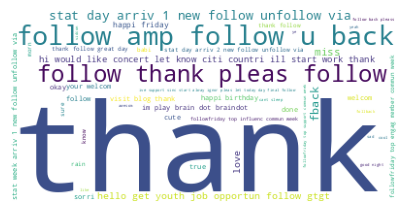

In [ ]:
plt.figure(figsize=(5,3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Öznitelik Çıkarımı:

## Tf Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(df['text_cleaned'])
feature_names = vectorizer.get_feature_names_out()
print("td Idf matris: ",tfidf_matrix.shape)

td Idf matris:  (10000, 10000)


## Model Eğitimi

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_matrix,
                        df['label'], test_size = 0.2, random_state=42)

## KNN

### Sınıflandırma ve regresyon algoritmasıdır.

Sınıflandırma için kullanıldığında, bir örneğin sınıfını belirlemek için komşularının sınıflarına bakar ve en yaygın olan sınıfı tahmin eder.

Regresyon için kullanıldığında ise, bir örneğin çıktısını belirlemek için komşularının çıktılarına bakar ve bu çıktıların ortalamasını kullanır.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

## Performans Değerlendirme Metrikleri

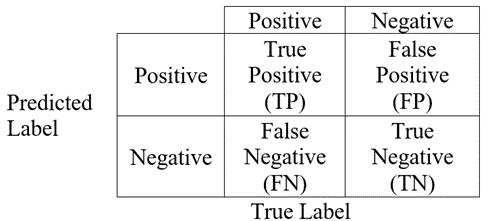 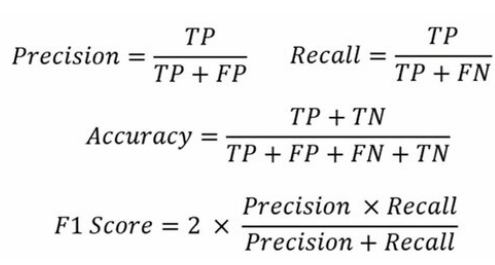


In [ ]:
print("knn sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Hassasiyet",recall_score(y_test,y_pred))
print("Kesinlik",precision_score(y_test,y_pred))

knn sonuçları
Doğruluk:  0.6
F1:  0.37106918238993714
Hassasiyet 0.23647294589178355
Kesinlik 0.8613138686131386


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

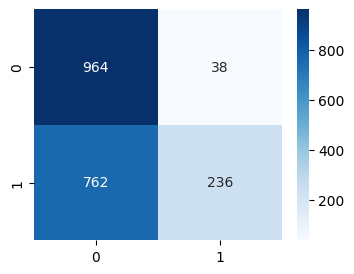

In [ ]:
cm = confusion_matrix(y_test ,y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

## RandomForest

### Random Forest, sınıflandırma ve regresyon problemleri için kullanılan bir makine öğrenimi algoritmasıdır. Temelde birden fazla karar ağacını bir araya getirerek daha güçlü ve kararlı bir model oluşturur.

> knn e göre daha yavaştır

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 150)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

In [ ]:
print("Random Forest sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_clf))
print("F1: ",f1_score(y_test,y_pred_clf))
print("Hassasiyet",recall_score(y_test,y_pred_clf))
print("Kesinlik",precision_score(y_test,y_pred_clf))

Random Forest sonuçları
Doğruluk:  0.7485
F1:  0.7291330102315562
Hassasiyet 0.6783567134268537
Kesinlik 0.7881257275902211


<Axes: >

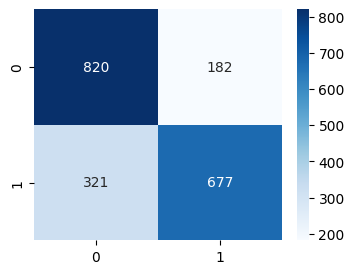

In [ ]:
cm = confusion_matrix(y_test ,y_pred_clf)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

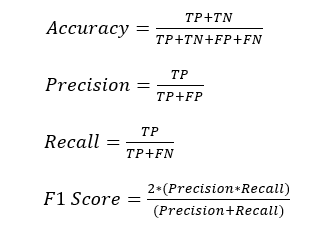

## Logistic Regresyon

### Logistic Regresyon, sınıflandırma problemleri için kullanılan bir makine öğrenimi algoritmasıdır. Özellikle ikili sınıflandırma problemlerinde yaygın olarak kullanılır.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
print("LR sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_lr))
print("F1: ",f1_score(y_test,y_pred_lr))
print("Hassasiyet",recall_score(y_test,y_pred_lr))
print("Kesinlik",precision_score(y_test,y_pred_lr))

LR sonuçları
Doğruluk:  0.7535
F1:  0.746268656716418
Hassasiyet 0.7264529058116233
Kesinlik 0.7671957671957672


<Axes: >

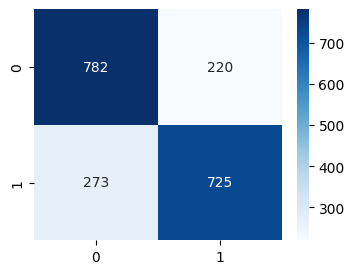

In [ ]:
cm = confusion_matrix(y_test ,y_pred_lr)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

## SVM (Destek Vektör Makineleri (Support Vector Machines))

### Belirlenen iki kategoriden birine ya da diğerine ait olarak işaretlenmiş bir dizi eğitim örneği verildiğinde, SVM eğitim algoritması, bir olasılık dışı ikili doğrusal sınıflandırıcı haline getirerek bir kategoriye ya da diğerine yeni örnekler atayan bir model oluşturur.

> bu algoritma da yavaş çalışan bir algoritma

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print("SVM sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_svm))
print("F1: ",f1_score(y_test,y_pred_svm))
print("Hassasiyet",recall_score(y_test,y_pred_svm))
print("Kesinlik",precision_score(y_test,y_pred_svm))

SVM sonuçları
Doğruluk:  0.755
F1:  0.7502548419979612
Hassasiyet 0.7374749498997996
Kesinlik 0.7634854771784232


<Axes: >

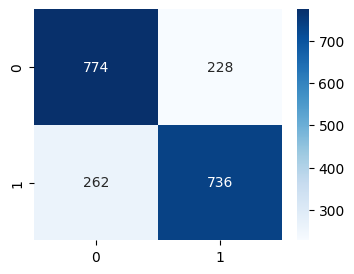

In [ ]:
cm = confusion_matrix(y_test ,y_pred_svm)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')